<a href="https://colab.research.google.com/github/riszwinger/tensorflow_cert/blob/main/basic/HorseVsHumans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Library

In [60]:
import os
import zipfile
import random

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential

## Download Zip file

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2021-08-03 02:26:44--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.128, 173.194.195.128, 173.194.196.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M   136MB/s    in 1.1s    

2021-08-03 02:26:45 (136 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip \
    -O /tmp/validation-horse-or-human.zip

--2021-08-03 02:26:54--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 64.233.191.128, 173.194.74.128, 172.217.219.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|64.233.191.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: ‘/tmp/validation-horse-or-human.zip’

/tmp/validation-hor 100%[===================>]  10.95M  --.-KB/s    in 0.1s    

2021-08-03 02:26:55 (79.1 MB/s) - ‘/tmp/validation-horse-or-human.zip’ saved [11480187/11480187]



## Check if file is downloaded

In [3]:
!ls /tmp

dap_multiplexer.11b59c6c16e3.root.log.INFO.20210803-020500.53
dap_multiplexer.INFO
debugger_23qz12bf6j
horse-or-human.zip
initgoogle_syslog_dir.0
validation-horse-or-human.zip


## Unzip

In [5]:
local_zip="/tmp/horse-or-human.zip"
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall("/tmp/horse-or-human")


local_zip="/tmp/validation-horse-or-human.zip"
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall("/tmp/validation-horse-or-human")

zip_ref.close()

In [6]:
!ls /tmp

dap_multiplexer.11b59c6c16e3.root.log.INFO.20210803-020500.53
dap_multiplexer.INFO
debugger_23qz12bf6j
horse-or-human
horse-or-human.zip
initgoogle_syslog_dir.0
validation-horse-or-human
validation-horse-or-human.zip


### Training Data Folder

In [7]:
!ls /tmp/horse-or-human

horses	humans


### Validation Data Folder

In [8]:
!ls /tmp/validation-horse-or-human

horses	humans


In [10]:
train_horse_dir="/tmp/horse-or-human/horses"
train_human_dir="/tmp/horse-or-human/humans"

val_horse_dir="/tmp/validation-horse-or-human/horses"
val_human_dir="/tmp/validation-horse-or-human/humans"

train_horse_name=os.listdir(train_horse_dir)
train_human_name=os.listdir(train_human_dir)

val_horse_name=os.listdir(val_horse_dir)
val_human_name=os.listdir(val_human_dir)

print("Number of Horses: {}, Number of Humans: {} in Training".format(len(train_horse_name),len(train_human_name)))
print("Number of Horses: {}, Number of Humans: {} in Validation".format(len(val_horse_name),len(val_human_name)))

Number of Horses: 500, Number of Humans: 527 in Training
Number of Horses: 128, Number of Humans: 128 in Validation


## Visulaize Data

In [52]:
def visualize_data(labels,dir,title):
  #labels=['horses','humans']
  num_class=len(labels)
  #train_dir="/tmp/horse-or-human/"
  fig,ax=plt.subplots(num_class,5,figsize=(15,7))
  for i in range(num_class):
    for j in range(5):
      #img_list=random.shuffle(os.listdir(os.path.join(train_dir,labels[i])),random.random)
      img_list=(os.listdir(os.path.join(dir,labels[i])))
      #print(img_list)
      img=img_list[random.randint(0,len(img_list))]
      ax[i,j].imshow(mpimg.imread(os.path.join(dir,labels[i],img)))
      ax[i,j].set_title(img)
      ax[i,j].axis('off')

  #plt.tight_layout()
  plt.suptitle(title)

  plt.show()




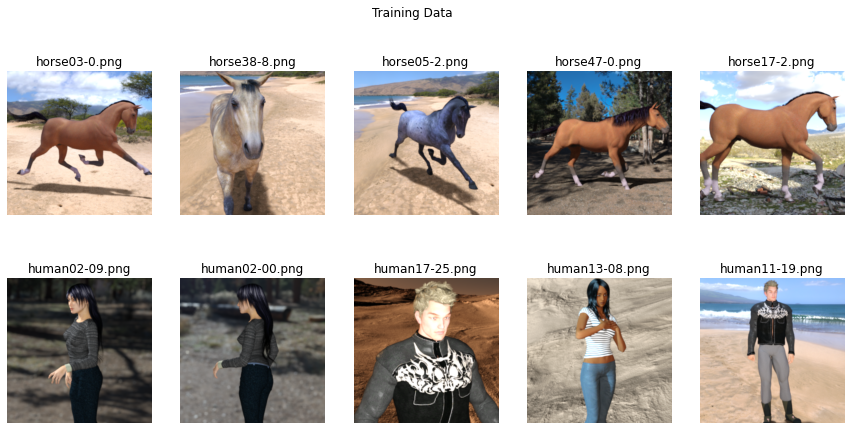

______________________________________________________________________________________________________________________________________________________


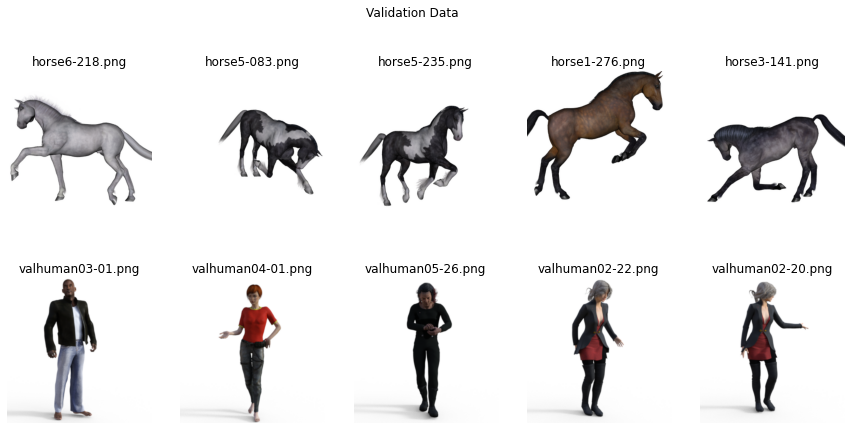

In [58]:
labels=['horses','humans']
dir='/tmp/horse-or-human/'
title='Training Data'
visualize_data(labels,dir,title)
print("_"*150)
labels=['horses','humans']
dir='/tmp/validation-horse-or-human/'
title='Validation Data'
visualize_data(labels,dir,title)

## Data Generator

In [15]:
train_datagen=ImageDataGenerator(rescale=1/255.0)
valid_datagen=ImageDataGenerator(rescale=1/255.0)

In [73]:
train_generator=train_datagen.flow_from_directory("/tmp/horse-or-human/",target_size=(300,300),class_mode='binary',batch_size=128)
valid_generator=valid_datagen.flow_from_directory("/tmp/validation-horse-or-human/",target_size=(300,300),class_mode='binary',batch_size=32)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


## Model Building

In [74]:
model=Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(300,300,3)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 78400)            

In [75]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),loss=tf.keras.losses.binary_crossentropy,metrics=['acc'])

In [78]:
steps_per_epoch=1027//128 ## (number of training records/ batch_size)
validation_steps=256//32 ## (number of validation records/ batch_size)

print('steps_per_epoch: {}, validation_steps: {}'.format(steps_per_epoch,validation_steps))

steps_per_epoch: 8, validation_steps: 8


In [79]:
history=model.fit(train_generator,steps_per_epoch=steps_per_epoch,epochs=15,validation_data=valid_generator,validation_steps=validation_steps,verbose=2)

Epoch 1/15
8/8 - 144s - loss: 3.2305 - acc: 0.5996 - val_loss: 0.6246 - val_acc: 0.5039
Epoch 2/15
8/8 - 87s - loss: 0.6360 - acc: 0.6874 - val_loss: 0.4515 - val_acc: 0.8828
Epoch 3/15
8/8 - 82s - loss: 0.4793 - acc: 0.7631 - val_loss: 1.2126 - val_acc: 0.6523
Epoch 4/15
8/8 - 82s - loss: 0.4434 - acc: 0.8420 - val_loss: 1.3997 - val_acc: 0.6406
Epoch 5/15
8/8 - 82s - loss: 0.2006 - acc: 0.9121 - val_loss: 1.6203 - val_acc: 0.6992
Epoch 6/15
8/8 - 82s - loss: 0.0784 - acc: 0.9722 - val_loss: 1.7680 - val_acc: 0.7148
Epoch 7/15
8/8 - 85s - loss: 0.0796 - acc: 0.9677 - val_loss: 0.5572 - val_acc: 0.8789
Epoch 8/15
8/8 - 81s - loss: 0.0880 - acc: 0.9588 - val_loss: 1.4560 - val_acc: 0.8164
Epoch 9/15
8/8 - 86s - loss: 0.3862 - acc: 0.9244 - val_loss: 4.8148 - val_acc: 0.6562
Epoch 10/15
8/8 - 82s - loss: 1.3490 - acc: 0.8254 - val_loss: 1.3462 - val_acc: 0.7969
Epoch 11/15
8/8 - 81s - loss: 0.0421 - acc: 0.9933 - val_loss: 1.6623 - val_acc: 0.8086
Epoch 12/15
8/8 - 81s - loss: 0.0200 - a

In [81]:
model.evaluate(valid_generator)

8/8 [==============================] - 7s 810ms/step - loss: 2.5373 - acc: 0.7930


[2.537325382232666, 0.79296875]